In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [9.00, 5.00]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0



<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Numerisk derivasjon og integrasjon

* **Emne INGA1002 - Programmering, numerikk og sikkerhet**
* **Uke 39, 2023**
    * *Torsdag*
* **Underviser: Kai Erik Hoff**


# Kunngjøringer

* Øving 1 frivillig

# Visuell tilnærming til matematisk fagstoff

* Én ferdighet som kan være et enormt fortrinn i matematiske fag er evnen til å visualisere formler og uttrykk.
    * Eksempel: pytagoras læresetning illustrert.
* Lineær algebra kan være krevende, nettopp fordi visualisering praktisk talt blir umulig for vektorer og matriser med mer enn 3 rader/kolonner.
    * Kan allikevel *sterkt* anbefale denne videoserien
* Derivasjon og integrasjon er godt egnet for visualisering
    * Vektlegger derfor å etablere paralleller mellom matematiske formler og visuelle fremstillinger.

## Men først: *hva skal vi med numerisk derivasjon og integrasjon*?

<img src="Figurer/Uke39/Thinking_man.jpg" align="left" style="width: 50%">

# Bruksområder

1. Enkel utregning av den deriverte $f'(x)$ eller bundet integral $\int_a^b f(x) dx $ for en funksjon $f(x)$, når funksjonen vil være tungvindt å regne med analytisk.
    * Eksempel: $f(x) = x^x$

2. Måleserier.
    * Målinger av f.eks.havninvå over tid
    * Krevende å finne funksjonsuttrykk som passer med den målte dataen
    * Numerisk analyse av selve måleserien er mye enklere &#128522;
    
	

## Eksempel: *hastighetsmåling*

<div width="100%">
    <br>
    <br>
    <img src="Figurer/Uke39/Speedometer.jpg" align="right" style="width:25%"/>
    <div style="width: 55%">
    <ul>
      <li>Kjøretøy trenger å vite hva deres egen hastighet er.</li>
      <li>I en bil er dette nokså lite komplisert å få til:</li>
      <ul><li>Vi kjenner omkretsen til bilhjulene ($s$).</li>
          <li>Vi kan måle tiden én rotasjon av akslingen bruker ($t$). </li>
          <li>Bilens hastighet: $v = \frac{s}{t}$</li>
        </ul>
    </ul>  
    </div>
</div> 

* Ikke noe behov for intrikate numeriske metoder her.

<div width="100%">
    <br>
    <br>
    <img src="Figurer/Uke39/Quadcopter.jpg" align="right" style="width:45%"/>
    <div style="width: 45%">
    <h2> Eksempel: <i>hastighetsmåling</i></h2>
    <ul>
      <li>Hva med en drone?</li>
      <ul><li>Ingen hjul eller andre komponenter med bakkekontakt.</li>
        </ul>
    </ul>  
    </div>
</div> 

* **Alternativ 1: GPS**
    * GPS måler posisjon
    * Ved å derivere posisjonsmålingene numerisk finner vi *endring i posisjon per tidsenhet*, altså *hastigheten $v(t)$*.

# Numerisk derivasjon

* Tre metoder: *foroverdifferanse, bakoverdifferanse og senterdifferanse*
* Vi ser på funksjonen $f_1(x) = 5x^3 -2x^2 - x - 3, \ \ \ -2 \leq t \leq 2$
    * Funksjonens deriverte: $f_1'(x) = 15x^2 - 4x - 1$

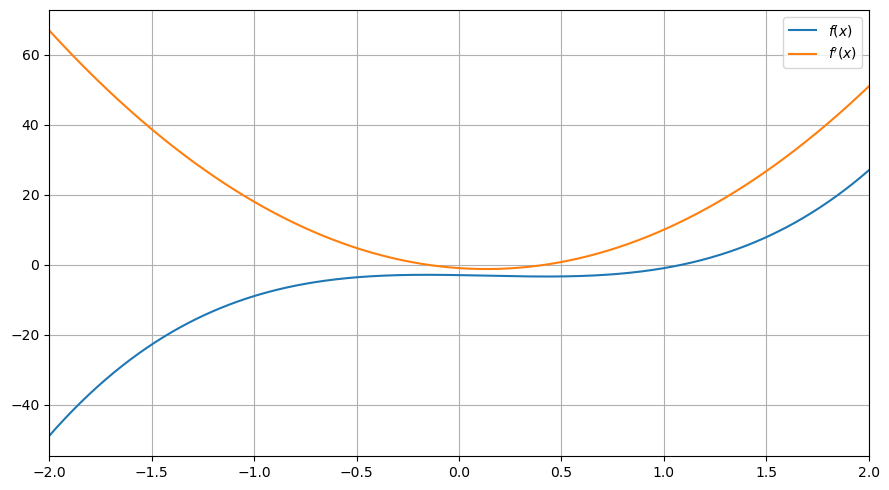

In [2]:
def f1(x):
    y = 5*x**3 -2*x**2 - x - 3
    return y

def dfdx(x):
    y = 15*x**2 - 4*x - 1
    return y
x = np.linspace(-2, 2, 501)

plt.figure()
plt.plot(x, f1(x), label="$f(x)$")
plt.plot(x, dfdx(x), label="$f'(x)$")
plt.grid(True)
plt.legend()

## Regneeksempel:

* Bruk foroverdifferanse til å estimere den deriverte $f_1'(x)$ til funksjonen $f_1(x) = 5x^3 -2x^2 - x - 3$ i punktet $x=1$, med skrittlengde $h=0.1$.

# Foroverdifferanse med pythoneksempel

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

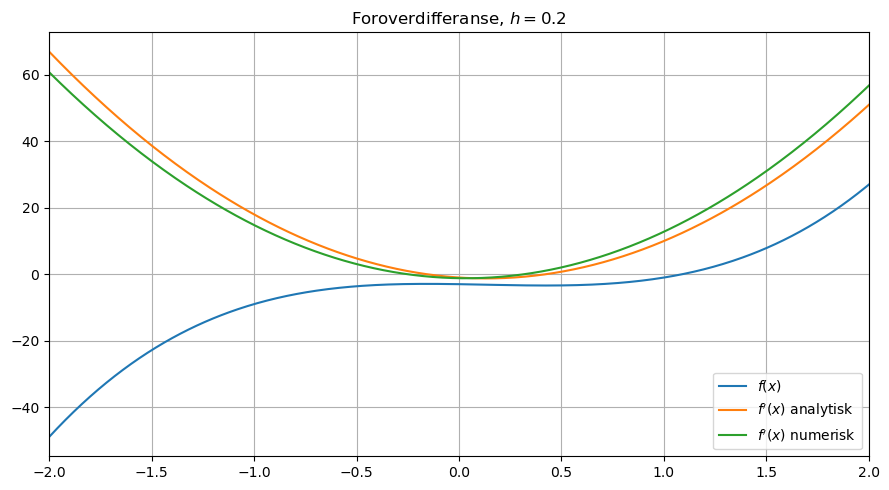

In [3]:
# Lag en ny funksjon for å derivere f(x) i punkt(ene) x
def fwdDiff(f, x, h):
    f_diff = (f(x + h) - f(x))/h 
    return f_diff

h = 0.2 # Bestem skrittlengde

# Lag plot av f(x), korrekt f'(x) og numerisk utregnet f'(x)
plt.plot(x, f1(x), label="$f(x)$")
plt.plot(x, dfdx(x), label="$f'(x)$ analytisk")
plt.plot(x, fwdDiff(f1, x, h), label=r"$f'(x)$ numerisk")
plt.title(f"Foroverdifferanse, $h={h}$")
plt.legend()

# Bakoverdifferanse i Python

$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

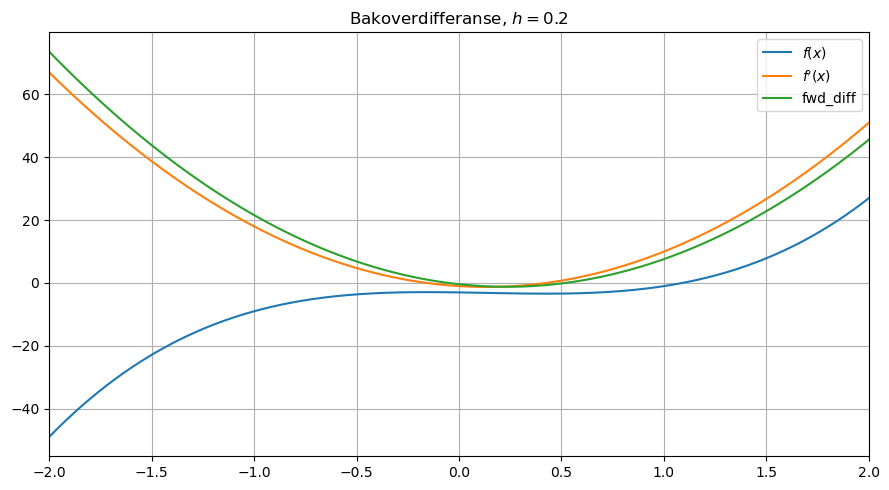

In [4]:
# Lag en ny funksjon for å derivere f(x) i punkt(ene) x
def backDiff(f, x, h):
    f_diff = (f(x) - f(x-h))/h 
    return f_diff

h = 0.2 # Bestem skrittlengde

plt.plot(x, f1(x), label="$f(x)$")
plt.plot(x, dfdx(x), label="$f'(x)$")
plt.plot(x, backDiff(f1, x, h), label=r"fwd_diff")
plt.title(f"Bakoverdifferanse, $h={h}$")
plt.legend()

# Senterdifferanse med pythoneksempel

* Formel: 
$$f'(x) \approx \frac{f\left(x+\frac{h}{2}\right) - f\left(x-\frac{h}{2}\right)}{h}$$

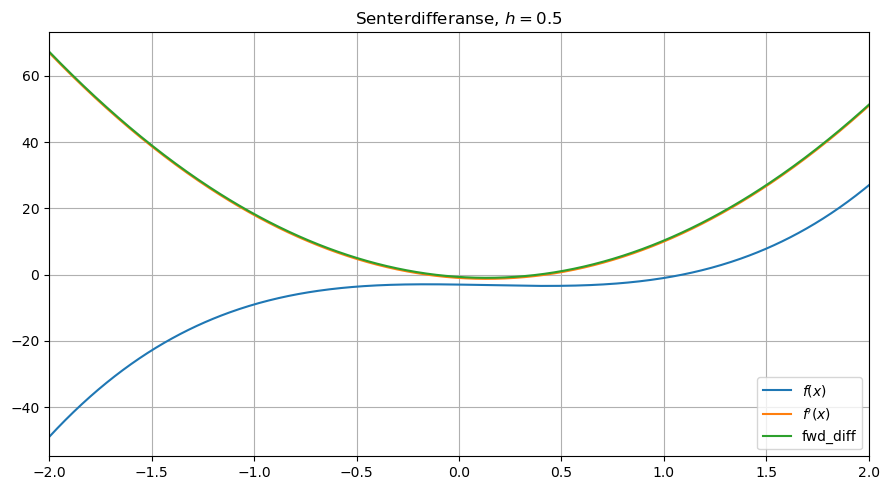

In [5]:
# Lag en ny funksjon for å derivere f(x) i punkt(ene) x
def centerDiff(f, x, h):
    f_diff = (f(x + h/2) - f(x - h/2))/h 
    return f_diff

h = 0.5 # Bestem skrittlengde

plt.plot(x, f1(x), label="$f(x)$")
plt.plot(x, dfdx(x), label="$f'(x)$")
plt.plot(x, centerDiff(f1, x, h), label=r"fwd_diff")
plt.title(f"Senterdifferanse, $h={h}$")
plt.legend()

# Avvik

* Observasjoner:
    * Mindre skrittlengde $h$ gir mindre avvik
    * Senterdifferanse har mindre avvik enn både forover og bakoverdifferanse
    * Vær varsom med veldig små skrittlengder. 
        * Etter hvert vil avrundingsfeilen i flyttall "ta over", og vi får store avvik igjen.
        * Tips: Valg av skrittlengde $h$ som en negativ eksponent av $2$ (dvs. $2^{-1},\ 2^{-2},\ 2^{-3} \ldots$) kan hjelpe *litt*.

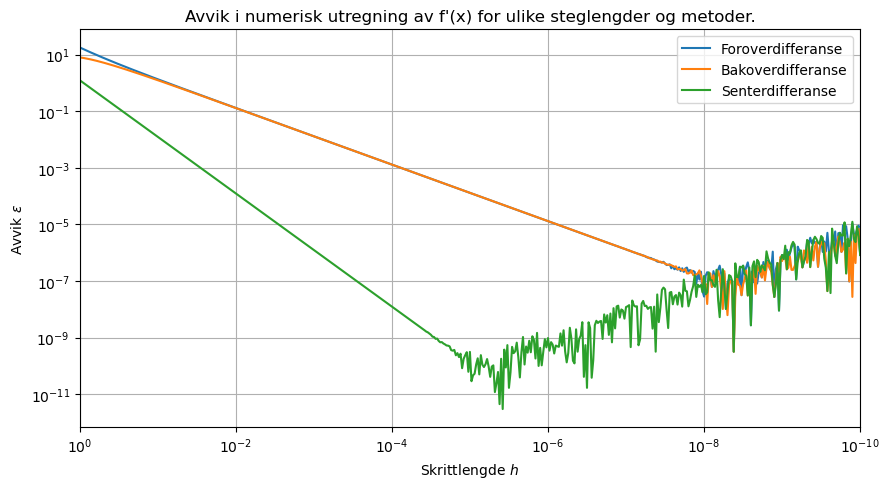

In [6]:
# Kodeillustrasjon: avvik i utregnet f'(1) for ulike verdier av h

h = np.logspace(0, -10, 501) # Eksponentielt krympende verdier av h
x = 1 # Vi regner ut den deriverte i punktet x=1

# Regn ut avvik for de ulike metodene
backError = np.abs(dfdx(x) - backDiff(f1, x, h))
fwdError = np.abs(dfdx(x) - fwdDiff(f1, x, h))
centerError = np.abs(dfdx(x) - centerDiff(f1, x, h))

# Lag plot av det hele
plt.loglog(h, fwdError, label="Foroverdifferanse")
plt.loglog(h, backError, label="Bakoverdifferanse")
plt.loglog(h, centerError, label="Senterdifferanse")
plt.xlim([h[0], h[-1]])
plt.xlabel("Skrittlengde $h$")
plt.ylabel(r"Avvik $\epsilon$")
plt.title("Avvik i numerisk utregning av f'(x) for ulike steglengder og metoder.")
plt.legend()
plt.show()

# Derivasjon av måleserier

* Skrittlengden $h$ bestemt av f.eks. tidsintervallet mellom målinger.

<img src="Figurer/Uke39/Maleserie.png" style="width:80%"/>

* Måleserien er en *diskret tallserie* . 
    * Typisk notasjon er f.eks. $x_n$

* Formål: finne en estimert verdi for $\frac{dx(t)}{dt}$ hvert av måletidspunktene

<div width="100%">
    <br>
    <br>
    <img src="Figurer/Uke39/Quadcopter.jpg" align="right" style="width:25%"/>
    <div style="width: 65%">
        <h2> Eksempel på måleserie: <i>posisjonsdata for drone</i></h2>
    <ul>
      <li>Tilbake til dronen vår...</li>
        <li>Vi antar at dronen beveger seg kun i én dimensjon.</li>
        <li>Posisjon langs en rett linje gitt som en ukjent funksjon $x(t)$</li>
        <li>Vi har tilgang på en måleserie $x_n$ tatt med $h$ sekund mellomrom: $x_n = x(n\cdot h)$
    </ul>  
    </div>
</div> 

Text(0, 0.5, 'Strekning (meter)')

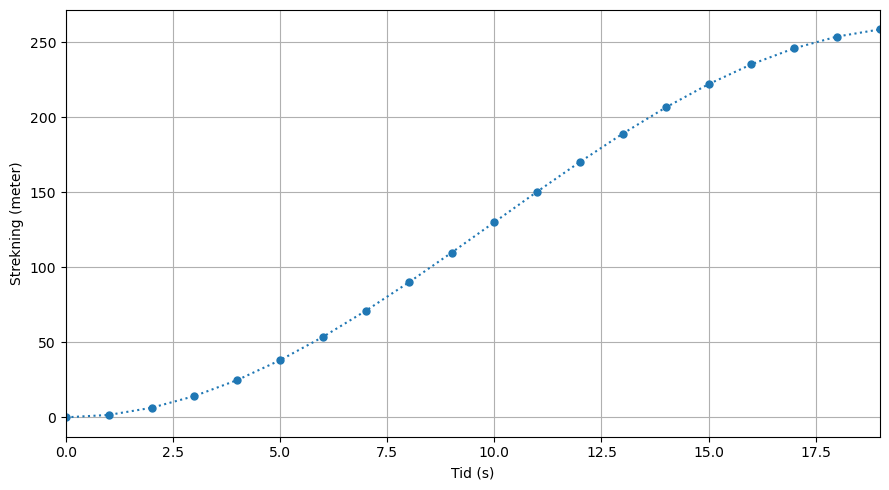

In [7]:
# Array med posisjonsdata:
x_n = np.array([  0.       ,   1.6005157,   6.3626529,  14.1691519,  24.8277907,
                38.0761184,  53.5879172,  70.981235 ,  89.8277907, 109.6635195,
               130.       , 150.3364805, 170.1722093, 189.018765 , 206.4120828,
               221.9238816, 235.1722093, 245.8308481, 253.6373471, 258.3994843])

h =  1 # Sekund mellom hver måling
t_n = np.arange(0, len(x_n)*h, h) # Tidspunkt for målinger
plt.plot(t_n,x_n, ':o', markersize=5)
plt.xlabel('Tid (s)')
plt.ylabel('Strekning (meter)')

# Bakoverdifferanse for måleserie:
$$ v_n = \dot{x}_n \approx \frac{x_{n} - x_{n-1}}{h}$$

* I Python:
    1. Iterer gjennom skevensen `x` med en `for`-løkke.
    2. Subtraher forrige element i `x` fra nåværende element i `x` for å finne differansen.
    3. Del differansen på skrittlengden `h`.

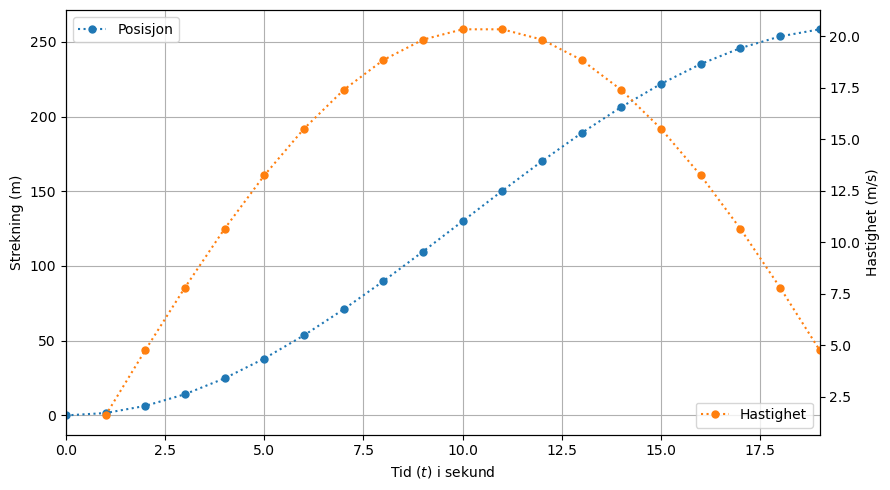

In [8]:
v_n = np.zeros(len(x_n)-1)
for n in range(1, len(x_n)): # Legg merke til at vi starter i n=1!
    v_n[n-1] = (x_n[n]-x_n[n-1])/h
    
plt.plot(t_n, x_n, ':o', markersize=5, label="Posisjon")
plt.ylabel("Strekning (m)")
plt.legend(loc="upper left")
plt.xlabel("Tid ($t$) i sekund")
plt.twinx()
plt.plot(t_n[1:], v_n, ':oC1', markersize=5, label="Hastighet")
plt.ylabel("Hastighet (m/s)")
plt.legend(loc="lower right")
plt.grid(False)

## Potensielle komplikasjoner med derivasjon av posisjonsdata
* Vi har nå et estimat for dronens hastighet $v(t)$ i tidspunktene når posisjonsmålingene ble tatt.
* Dessverre er GPS data godt kjent for å være litt unøyaktig.
    * Målt posisjon vil ofte "hoppe" litt frem og tilbake 
    * Dette vil gi merkbart utslag i estimert hastighet

### Alternativ kilde til farstdata: *akselerometer*

* Akselerasjon er lett å måle! 
    * Akselerasjonen til en heis kan vi f.eks. måle ved å stå på en baderomsvekt i heisa.
* Gitt tigang på akselerasjonsmålinger kan vi regne ut hastighet ved hjelp av *numerisk integrasjon*.

# Numerisk Integrasjon



<div width="100%">
    <img src="Figurer/Uke39/BndIntegral.png" style="width:25%" align="right"/>
    <div style="width: 65%">
    <br>
    <ul>
        <li> <b>Formål:</b> Bruke numeriske metoder til å finne en tilnærmet løsning til et bundet integral</li>
        </ul>
    </div>
    <p>
        $$\int_a^b f(x)\ dx = \text{S}$$
    </p>
</div> 

<div width="100%">
    <img src="Figurer/Uke39/BndIntegral2.png" style="width:25%" align="right"/>
    <div style="width: 65%">
    <br>
    <ul>
        <li> <b>Generell fremgangsmåte:</b> Del opp kurven i mange små biter, og finn et forenklet uttrykk som approksimerer $f(x)$ innenfor de små bitene.</li>
        </ul>
    </div>
</div> 

## Funksjon som skal integreres:

$$f(x) = (x-1)^2 \ \ \   \text{     mellom } a=-2 \text{ og } b = 4$$

$$S = \int_{-2}^{4} (x-1)^2 dx $$

In [9]:
# Funksjonen
def f2(x):
    y = (x-1)**2
    return y

# Plott kurven mellom a og b:
a, b = -2, 4
x = np.linspace(a, b, 201)
plt.plot(x, f2(x), label="$f(x)$", linewidth=2)
plt.fill_between(x, f2(x), color='C0', alpha=0.2, label="S")
plt.legend()

# Metode 1: Trapesmetoden

* Bruker en lineær funksjon (f.eks. $f_1(x) = 2x+3$) til å fylle inn kurven mellom to punkt $\left(x, f(x)\right)$ og $\left(x+h, f(x+h)\right)$
    * Med andre ord: tegn en rett strek mellom to punkt på kurven.

<img src="Figurer/Uke39/Trapezoidal_Int.png" style="width:80%"/>

* Hver av "bitene" i integralet blir da en ***trapes***.

## Areal for én trapes

$$A_{\text{trapes}} = h\cdot \left(\frac{f(a) + f(a+h)}{2}\right) $$

* I Python ($h=1$):

Areal: 6.5


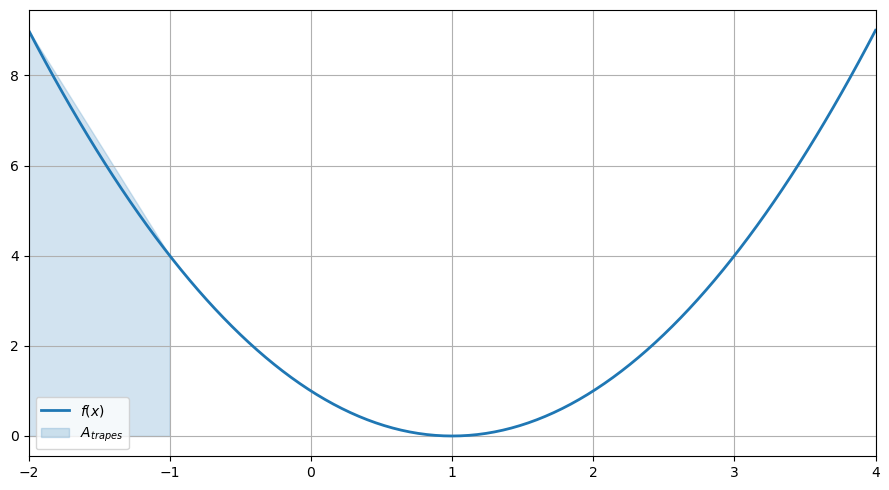

In [10]:
h = 1
A_trap = h*(f2(a) + f2(a+h))/2
print(f"Areal: {A_trap}")

# Lag figur
plt.plot(x, f2(x), label="$f(x)$", linewidth=2)
plt.fill_between([a, a+h], [f2(a), f2(a+h)], color='C0', alpha=0.2, label="$A_{trapes}$")
plt.legend()

## Areal for mange trapeser

* Legger man sammen arealet til alle de små trapesene, får vi en tilnærmet verdi for det samlede integralet.

$$ S \approx h \cdot \sum_{i=0}^{m-1} \frac{f(x_i) + f(x_{i+1})}{2}, \ \ \ m = \text{antall trapeser}$$

* NB! Skrittlengden $h$ bør regnes ut basert på antallet trapeser $m$.

In [11]:
# Bestem antall trapeser 'm' og skrittlengde 'h'
m = 6 # Antall trapeser
h = (b-a)/m
print(f"h = {h}")

# Lag serien med x-verdier på kanten av hver trapes x_i
x_i = np.linspace(a, b, m+1)

# Regn ut integralet med en oppsamlingsløkke:
S = 0
for i in range(m):
    S += h*(f2(x_i[i]) + f2(x_i[i+1]))/2
print(f"S = {S}")

# Illustrer i figur:
plt.plot(x, f2(x), label="$f(x)$", linewidth=2)
plt.fill_between(x_i, f2(x_i), color='C0', alpha=0.2, label="$S$")
plt.stem(x_i, f2(x_i), label="$f(x_i)$", basefmt='grey')
plt.legend()

h = 1.0
S = 19.0


# Metode 2: Simpson's metode


<div width="100%">
    <img src="Figurer/Uke39/SimpsonMethod.png" style="width:25%" align="right"/>
    <div style="width: 65%">
    <br>
    <ul>
        <li> Bruker en andreordens funksjon (f.eks. $f_1(x) = x^2 + 2x+3$) til å fylle inn tomrommet mellom <b>tre</b> punkt.</li>
        <ul><li> Med andre ord: tegn en parabelkurve som passerer gjennom tre punkt</li></ul>
        <li> Areal for ett segment: </li>
        </ul>
        <p>
            $$ A = \frac{h}{3}\cdot \left(f(x_0) + 4 f(x_1) + f(x_2)\right) $$
    </div>
</div> 

## Regneeksempel:
* Regn ut arealet av det første segmentet (mellom $x_0 = a  = -2 $ og $x_2 = a + 2\cdot h = 0$):
    * $h = 1$
$$ f(x) = (x-1)^2$$
    * Hvor stort er avviket mellom numerisk og analytisk utregnet areal?

## Areal $S$ for mange segment:

* Legger man sammen arealet til alle de små segmentene, får vi en tilnærmet verdi for det samlede integralet.

$$ S \approx \frac{h}{3} \cdot \sum_{i=0}^{m-1} f(x_{2i}) + 4\cdot f(x_{2i+1}) + f(x_{2i+2}), \ \ \ m = \text{antall segment}$$

* NB! Skrittlengden $h$ bør regnes ut basert på antallet punkt $m$.


<img src="Figurer/Uke39/SimpsonComposite.gif" style="width:55%"/>

### I Python:

In [12]:
# Bestem antall trapeser 'm' og skrittlengde 'h'
a, b = -2, 4
m = 3
h = (b-a)/(2*m)
print(f"h = {h}")

# Lag serien med x-verdier på kanten av hver trapes x_i
x_i = np.linspace(a, b, 2*m+1)

# Regn ut integralet med en oppsamlingsløkke:
S = 0
for i in range(0, m):
    S += h/3*(f2(x_i[2*i]) + 4*f2(x_i[2*i+1]) + f2(x_i[2*i+2]))
print(f"S = {S}")


h = 1.0
S = 18.0


  <div width="100%">
    <br>
    <br>
    <img src="Figurer/Uke39/Quadcopter.jpg" align="right" style="width:25%"/>
    <div style="width: 65%">
        <h2> Integrasjon av måleserie</h2>
    <ul>
      <li>La oss gå tilbake til droneeksempelet igjen.</li>
        <li>Et <b><i>akselerometer</i></b> kan gi oss informasjon om akselerasjonen til dronen.</li>
        <li>Nedenfor ser vi en rekke med målinger $a_n$ av akselerasjon $a(t)$ med $h=1$ sekund imellom.</li>
        <ul><li>dvs: $a_n = a(n\cdot h)$</li></ul>
    </ul>  
    </div>
</div> 

Text(0, 0.5, 'Akselerasjon ($m/s^2$)')

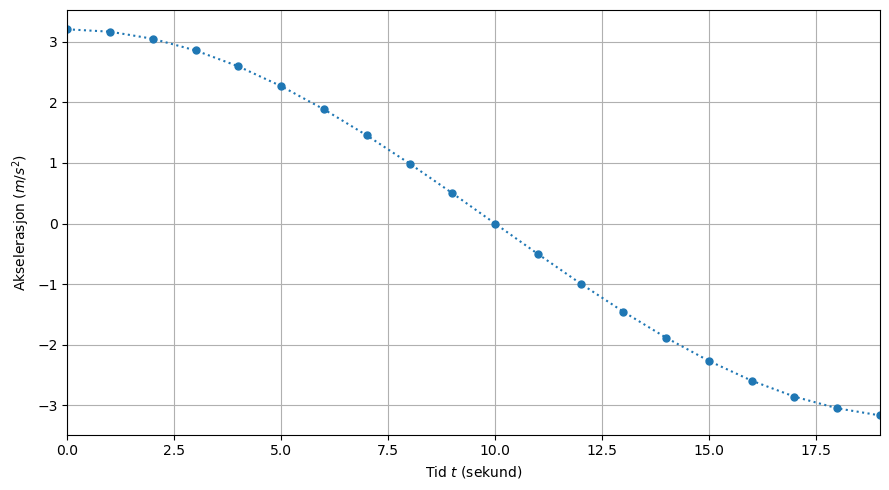

In [13]:
# a_n er en logg med akselerasjonsmålinger gitt i m/s
a_n = np.array([ 3.20762143e+00,  3.16813029e+00,  3.05062926e+00,  2.85801162e+00,
                2.59502025e+00,  2.26813086e+00,  1.88539257e+00,  1.45622966e+00,
                9.91209535e-01,  5.01782545e-01,  1.96410166e-16, -5.01782545e-01,
               -9.91209535e-01, -1.45622966e+00, -1.88539257e+00, -2.26813086e+00,
               -2.59502025e+00, -2.85801162e+00, -3.05062926e+00, -3.16813029e+00])

h = 1 # Skrittlengde lik 1 sekund
t_n = np.arange(0, h*len(a_n), h) # Array med måletidspunkt

plt.plot(t_n, a_n, ':o', markersize=5)
plt.xlabel("Tid $t$ (sekund)")
plt.ylabel("Akselerasjon ($m/s^2$)")

# Integrasjon av måleserie med trapesmetoden

* For å estimere hastighet over tid kan vi regne løpende integral fra $t=0$ til $t=n\cdot h$
    * $a[n]$ er måleserien med akselerasjonsdata i formelen under:

$$ v_n = S_n \approx \sum_{i=1}^{n} h \cdot \frac{a_{i-1} + a_i}{2}$$

* I Python:
    1. Initialiser oppsamlingsvariabelen S=0
    2. Iterer gjennom skevensen `x` med en `for`-løkke.
    3. Regn ut arealet av hvert trapes med bruk av `h` og to nabopunkter i måleserien
    4. Legg til trapesarealet til oppsamlingsvariabelen S

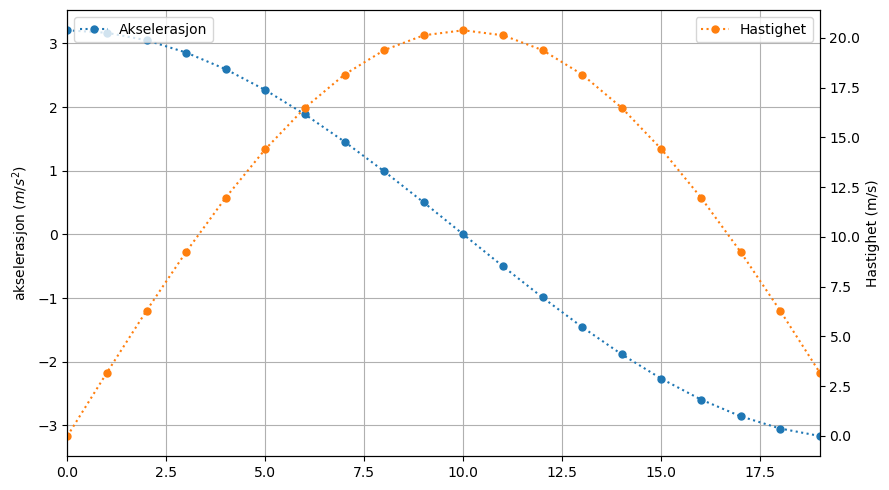

In [14]:
h = 1 # Sekund
v_n = np.zeros(len(x_n)) # Integral over tid
S = 0 # Samlet integral

# Løkke for å utføre numerisk integrasjon
for n in range(1,len(x_n)):
        S += (a_n[n] + a_n[n-1])/2*h
        v_n[n] = S

# Plott akselerasjonsdata og hastighetsdata
plt.plot(t_n, a_n, ':o', markersize=5, label = "Akselerasjon")
plt.legend(loc='upper left')
plt.ylabel("akselerasjon ($m/s^2$)")
plt.twinx()
plt.plot(t_n, v_n, ':oC1', markersize=5, label= "Hastighet")
plt.ylabel("Hastighet (m/s)")
plt.legend(loc='upper right')
plt.grid(False)

* Hvis vi blar tilbake til plottet med derivert posisjonsdata ser vi at dette passer veldig bra med hastigherskurven vi fant der.

# Hvilken metode vil vi at dronen skal bruke?

* ***Disclaimer:*** *alt herfra og ned er ikke å regne som pensum*
    * *Men det er et veldig interessant eksempel på bruk av numerisk integrasjon og derivasjon*


### En god tilnærming er å kombinere informasjonen fra begge sensorene:

* Hverken GPS eller akselerometer gir perfekte målinger i den virkelige verden
    * GPS har en del "målestøy", da den ofte gir litt avvik i tilfeldige retninger.
        * Når vi deriverer, vil slikt hyppig varierende avvik bare forsterkes.
    * Akselerometer er sjeldent 100% perfekt kalibrerte, og kan blant annet ha en liten såkalt *bias* (målingen heller alltid *litt* mot en spesiell retning)
        * Når vi integrerer vil bias akkumulere over tid, og føre til noe som kalles *drift*
* I kodecellen henter vi simulerte målinger fra en datafil som inkluderer begge de overnevnte feiltypene, og ser hva som skjer.

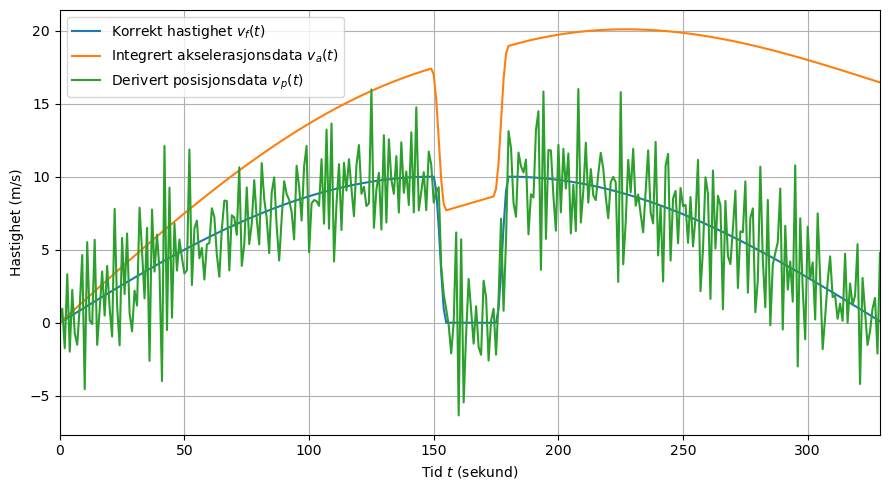

In [15]:
from scipy.io import loadmat
datafil = loadmat("Datafiler/Uke39/simulert_sensordata.mat")
h = datafil["h"] # Skrittlengde h
vf_n = datafil["vf_n"].flatten() # "Fasit" for hastighetsdata
a_n = datafil["a_n"].flatten() # Akselerasjonsdata med bias
p_n = datafil["p_n"].flatten() # Posisjonsdata med målestøy

# Deriver posisjonsdata med bakoverdifferanse
vp_n = np.zeros(len(p_n))
for n in range(1, len(p_n)): # Legg merke til at vi starter i n=1!
    vp_n[n] = (p_n[n]-p_n[n-1])/h
    
# Integrer akselerasjonsdata med trapesmetoden
va_n = np.zeros(len(a_n)) # Integral over tid
S = 0 # Samlet integral
for n in range(1,len(a_n)):
        S += (a_n[n] + a_n[n-1])/2*h
        va_n[n] = S

# Plot de to estimerte hastighetene langs med fasitverdien
t_n = np.arange(0, len(vf_n)*h, h)
plt.plot(t_n, vf_n, label="Korrekt hastighet $v_f(t)$")
plt.plot(t_n, va_n, label="Integrert akselerasjonsdata $v_a(t)$")
plt.plot(t_n, vp_n, label="Derivert posisjonsdata $v_p(t)$")
plt.xlabel("Tid $t$ (sekund)")
plt.ylabel("Hastighet (m/s)")
plt.legend()

* Som vist i figuren, er ingen av estimatene våre spesielt pålitelige. Den éne varierer vilt over og under den korrekte verdien, og den andre divergerer rolig men bestemt lengre og lengre vekk.

### Hvordan kombinere dataene?

* La oss se litt nærmere på figuren over. Selv om $v_s(t)$ har mye støy, har den typisk en *gjennomsnittsverdi* som ligger midt på "fasiten". Den kan altså sies å være pålitelig dersom vi regner *gjennomsnittsverdien* over lengre tid.
    * Her ønsker vi å regne ut et *vektet gjennomsnitt* (nyere målinger teller mer enn gamle målinger) som vi bruker videre.
* $v_a(t)$ derimot, er til å stole på for å fange opp raske endringer i hastighet, men over tid vil gjennomsnittsverdien divergere veldig.
    * Her ønsker vi å ta vare på *differansen* mellom målte verider og et *vektet gjennomsnitt* av $v_a(t)$.
    
* Algoritmen er illustrert i figuren nedenfor:

<img src="Figurer/Uke39/ComplementaryFilter.png" style="width:80%"/>

* For den simulerte måleserien kan dette implementers med programkoden nedenfor.
    * Metoden for utregning av vektet gjennomsnit $\bar{x}_n$ i en måleserie $x_n$ er ikke veldig ulik numerisk integrasjon, og er gitt i formelen nedenfor. Et annet navn på dette er et *lavpassfilter/glattefilter*.
$$\bar{x}_n = \alpha \cdot \bar{x}_{n-1} + (1-\alpha)\cdot x_{n}$$

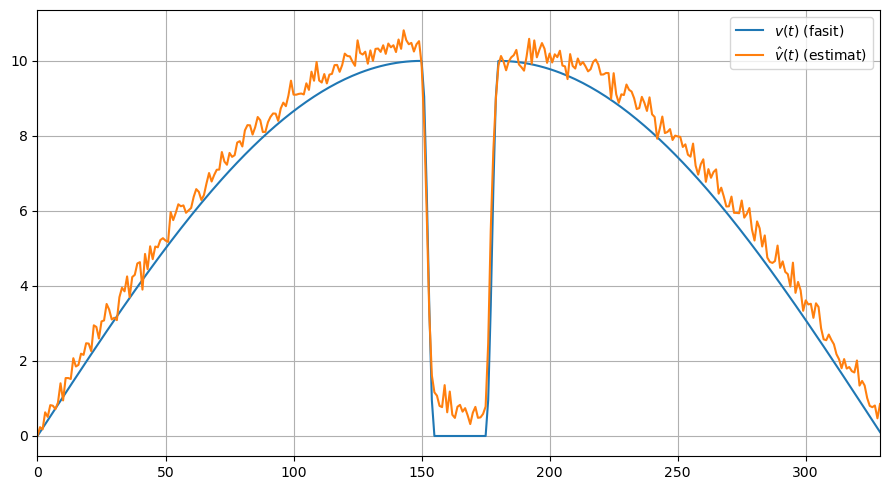

In [16]:
vp_avg = va_avg = va = vp = 0 # Initielle verdier
alpha = 0.9 # Faktor for utregning av vektet gjennomsnitt
h = 1 # Skrittlengde i sekund


v_est = np.zeros(len(p_n))
for n in range(1, len(p_n)):
    # Utfør numerisk derivasjon
    vp = (p_n[n]-p_n[n-1])/h 
    # Regn ut vektet gjennomsnitt av vp
    vp_avg *= alpha
    vp_avg += (1-alpha)*vp

    # Utfør numerisk integrasjon
    va += (a_n[n] + a_n[n-1])/2*h
    # Regn ut vektet gjennomsnitt av va
    va_avg *= alpha
    va_avg += (1-alpha)*va
    
    # Kombinér måledataene 
    v_est[n] = vp_avg + va - va_avg
        
plt.plot(t_n, vf_n, label="$v(t)$ (fasit)")
plt.plot(t_n, v_est, label="$\hat{v}(t)$ (estimat)")
plt.legend()

* Som vi ser, er ikke estimatet perfekt, men det ligger mye nærmere den sanne hastigheten enn $v_p(t)$ og $v_a(t)$ gjør.
* Dette er en relativt ukomplisert metode for å kombinere sensormålinger, men ikke nødvendigvis den mest pålitelige. Som noen av dere vil lære i løpet av studiet, finnes det også andre metoder enn dette som er mer populære.